In [58]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [59]:


# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [60]:
def produce_cube_points(x, z):
    camera_height = 0.013
    edge = 0.06
    A = np.array([[x, camera_height, z],
                  [x, camera_height -  edge, z],
                  [x - edge, camera_height -  edge, z],
                  [x - edge, camera_height, z],
                  [x, camera_height, z + edge],
                  [x, camera_height -  edge, z + edge],
                  [x - edge, camera_height -  edge, z + edge],
                  [x - edge, camera_height, z + edge]])
    return A

def changeCoordinates(point, movement):
    angle = - movement[2]
    x_translation = - movement[0]
    z_translation = - movement[1]
    Rxz = np.array([[np.cos(angle), 0, -np.sin(angle)],
                    [0, 1, 0],
                    [np.sin(angle), 0, np.cos(angle)]])

    # Apply the rotation matrix to point P
    point_rotated = np.dot(Rxz, point)

    # Translate the coordinates of P by x and z
    return point_rotated + np.array([x_translation, 0, z_translation])

def points_with_movement(x, z, movement):
    A = produce_cube_points(x, z)
    for i in range(len(A)):
        A[i] = changeCoordinates(A[i], movement)
    return A

In [61]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

# points3dOnCube = np.array([
#                         points_with_movement(0.26, 1., [0., - np.sin(10 * np.pi/180) * 0.174 * 2, np.pi / 9]),
#                         produce_cube_points(0.26, 1.),
#                         points_with_movement(0.26, 1., [- 0.026681288, 0.0567852171, - np.pi / 9])
#                         ])

points3dOnCube = np.array([
                        points_with_movement(0.1, 0.25, [0., - np.sin(10 * np.pi/180) * 0.174 * 2, np.pi / 9]),
                        produce_cube_points(0.1, 0.25),
                        points_with_movement(0.1, 0.25, [- 0.026681288, 0.0567852171, - np.pi / 9])
                        ])

points3dOnCube *= 100


3


In [62]:
def debug_print(point_2d):
    for i in range(len(point_2d)):
        print("[" + str(point_2d[i][0][0]) + ", " + str(point_2d[i][0][1]) + "],")

points3dOnCube1:   [[17.94742979  1.3        26.11507067]
 [17.94742979 -4.7        26.11507067]
 [12.30927407 -4.7        28.16719153]
 [12.30927407  1.3        28.16719153]
 [19.99955065  1.3        31.75322639]
 [19.99955065 -4.7        31.75322639]
 [14.36139493 -4.7        33.80534725]
 [14.36139493  1.3        33.80534725]]
[1281, 402],
[1281, 194],
[1057, 205],
[1057, 399],
[1233, 395],
[1233, 222],
[1048, 230],
[1048, 393],


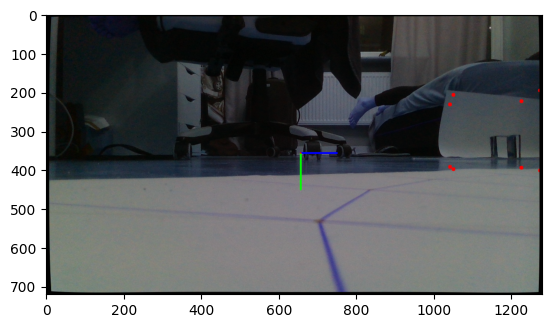

points3dOnCube1:   [[10.   1.3 25. ]
 [10.  -4.7 25. ]
 [ 4.  -4.7 25. ]
 [ 4.   1.3 25. ]
 [10.   1.3 31. ]
 [10.  -4.7 31. ]
 [ 4.  -4.7 31. ]
 [ 4.   1.3 31. ]]
[1021, 405],
[1021, 187],
[802, 188],
[801, 404],
[952, 396],
[952, 219],
[774, 220],
[774, 395],


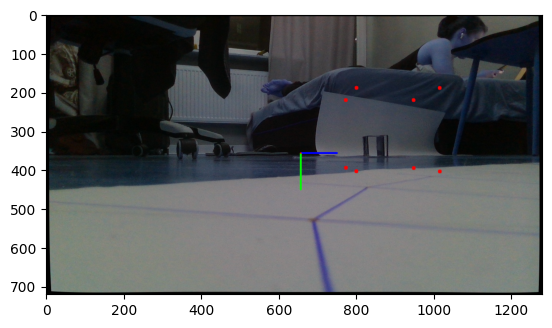

points3dOnCube1:   [[ 3.51455142  1.3        21.23399524]
 [ 3.51455142 -4.7        21.23399524]
 [-2.1236043  -4.7        19.18187438]
 [-2.1236043   1.3        19.18187438]
 [ 1.46243056  1.3        26.87215097]
 [ 1.46243056 -4.7        26.87215097]
 [-4.17572516 -4.7        24.82003011]
 [-4.17572516  1.3        24.82003011]]
[805, 412],
[806, 159],
[558, 139],
[559, 417],
[706, 401],
[706, 200],
[505, 187],
[506, 404],


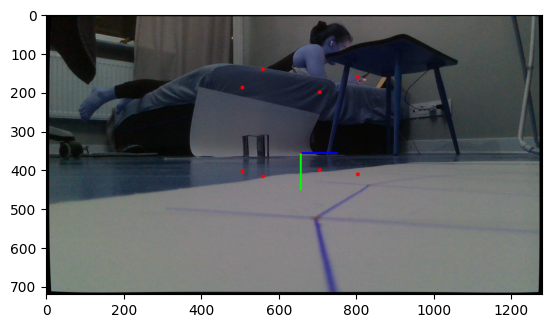

In [63]:
count = 0
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("points3dOnCube1:  ", points3dOnCube1)
        debug_print(point_2d)
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            i += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1